# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Moments, Sorting, Approximating & Matching Contours</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Sort Contours by Area <br>
2️⃣ Sort by Left to Right (Great for OCR) <br>
3️⃣ Approximate Contours <br>
4️⃣ Convex Hull <br>
</p>

In [2]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Finding Contours as per usual** ###

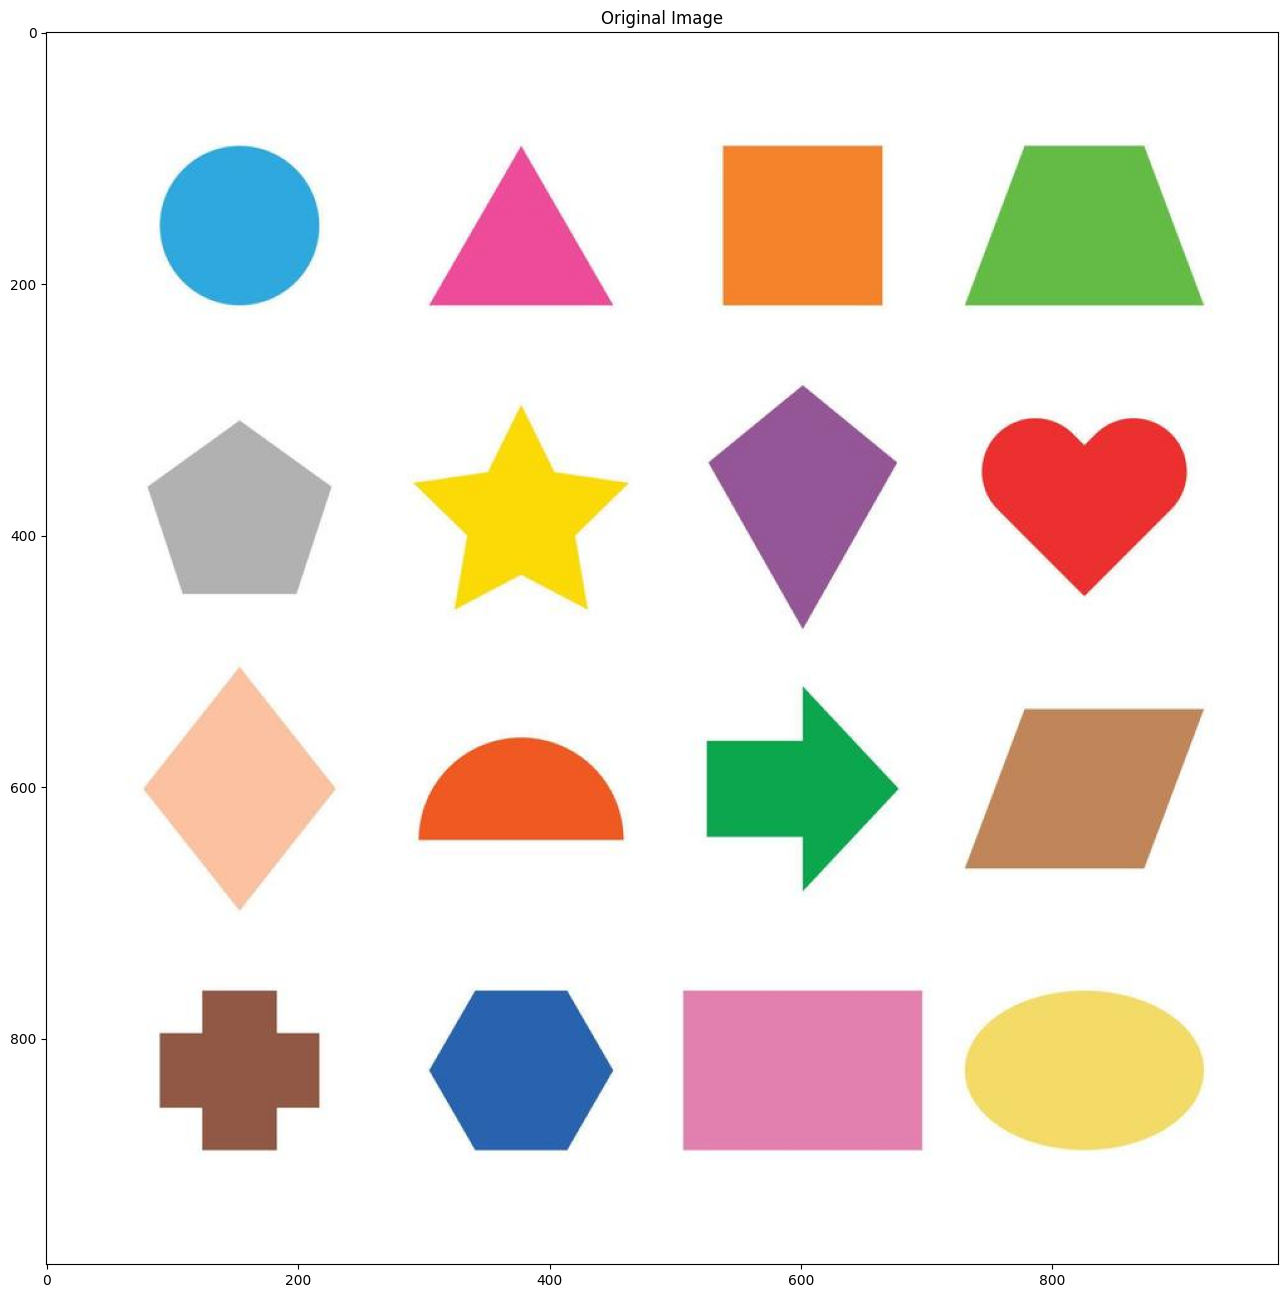

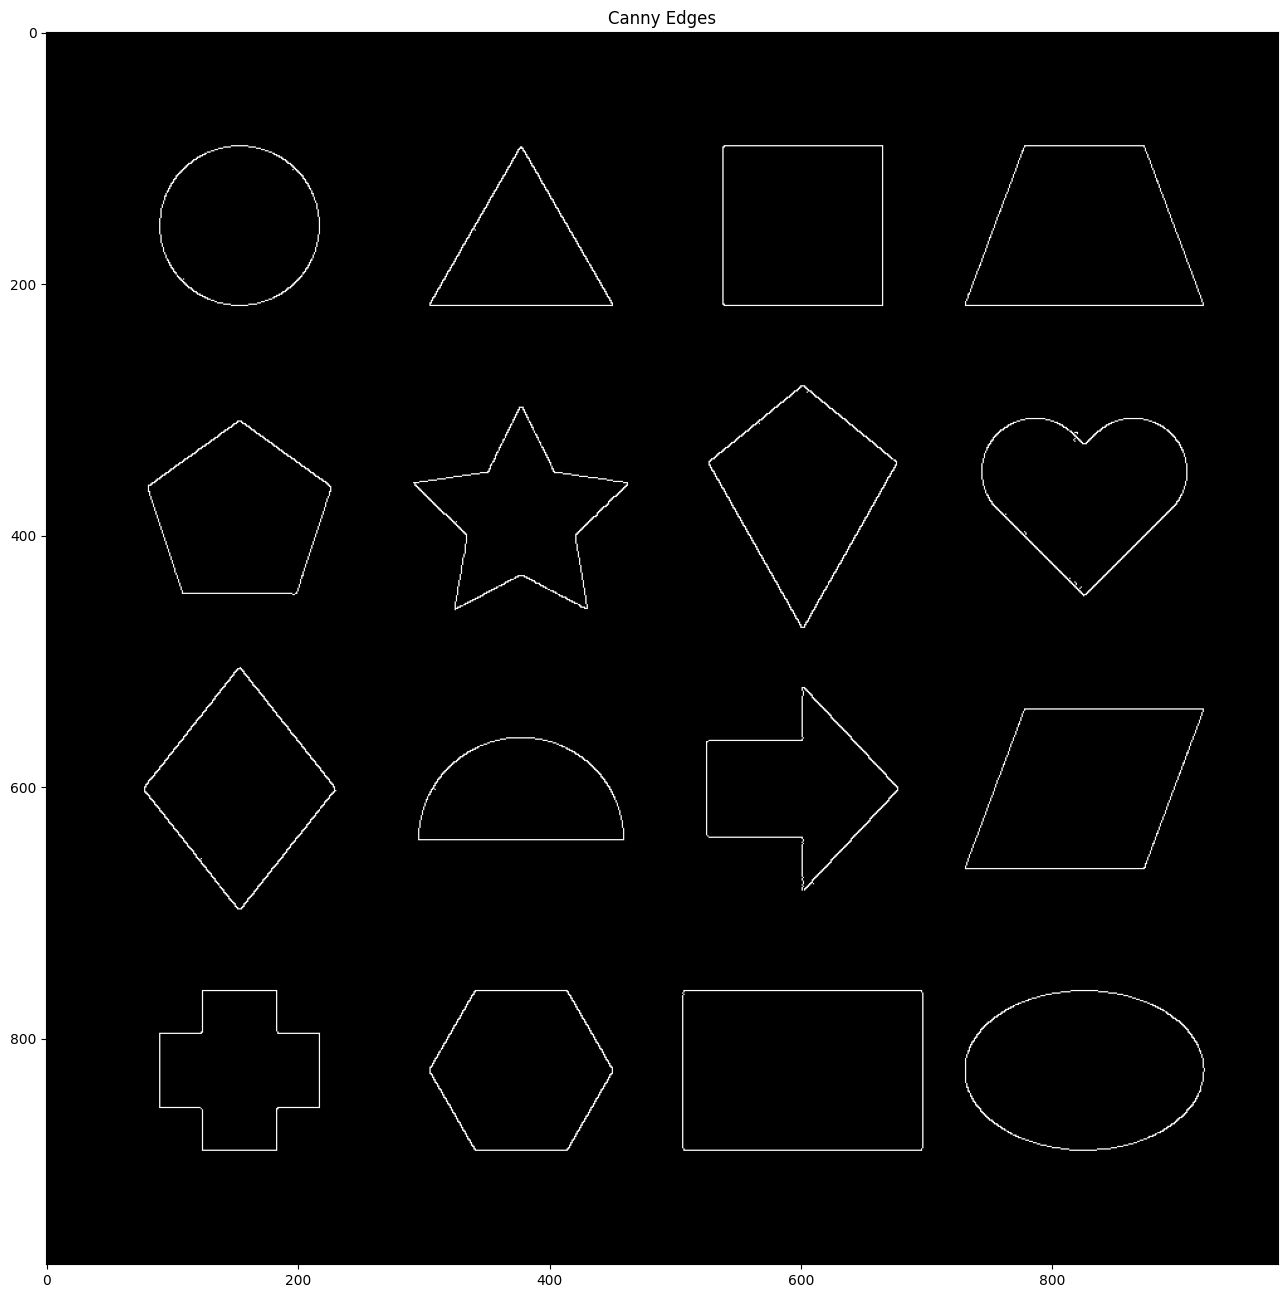

Number of contours found =  16


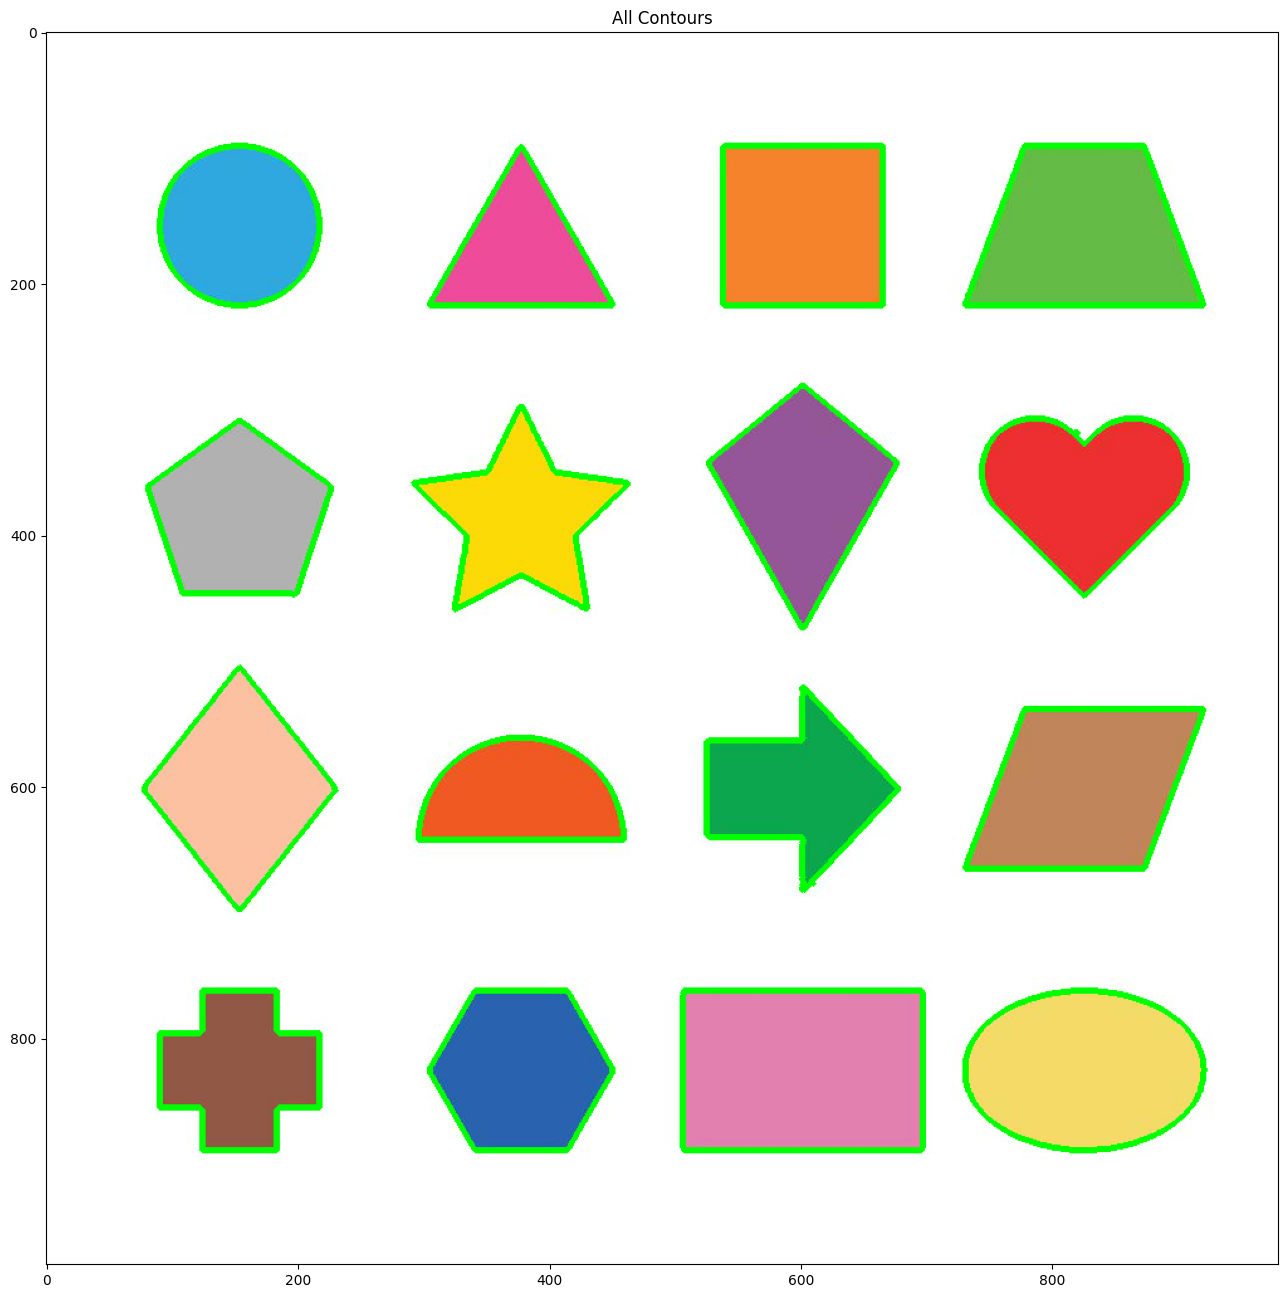

In [3]:
# Load our image
image = cv2.imread("../images/bunchofshapes.jpg")
imshow("Original Image", image)

# Grayscale our image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
imshow("Canny Edges", edged)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ",len(contours))

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
imshow("All Contours", image)

### **Sorting by Area using cv2.ContourArea and cv2.Moments** ###

Contour Areas before sorting...
[18994.0, 24250.0, 14010.0, 11513.0, 10437.0, 18116.0, 150.5, 15010.0, 13965.5, 15120.5, 12040.0, 14704.0, 9381.0, 18117.0, 16128.0, 12680.0]
Contour Areas after sorting...
[24250.0, 18994.0, 18117.0, 18116.0, 16128.0, 15120.5, 15010.0, 14704.0, 14010.0, 13965.5, 12680.0, 12040.0, 11513.0, 10437.0, 9381.0, 150.5]


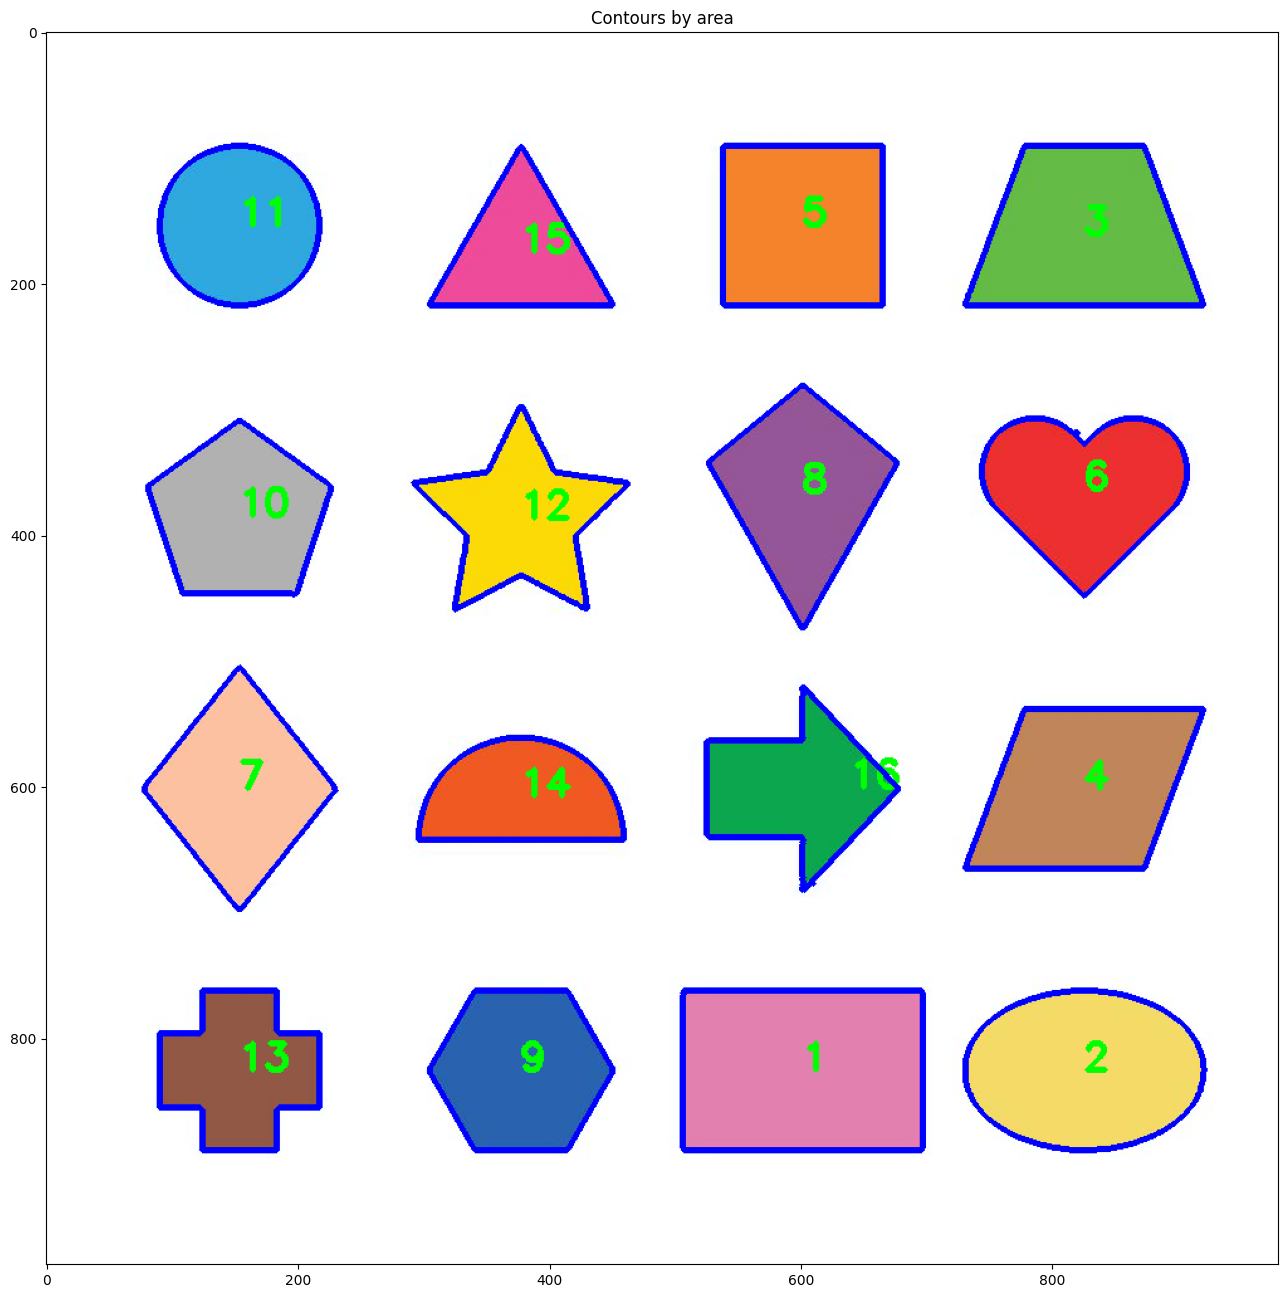

In [4]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    """return the area of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread("../images/bunchofshapes.jpg")

# Let's print the areas of the contours before sorting
print("Contour Areas before sorting...")
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Contour Areas after sorting...")
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i, c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255, 0, 0), 3)

imshow("Contours by area", image)

### **Define some functions we'll be using** ###

In [5]:
# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X coordinates for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

def label_contour_center(image, c):
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Draw the contour number on the image
    cv2.circle(image, (cx, cy), 10, (0, 0, 255), -1)
    return image

### **We use Moments to Calculate the Center and then use the X Coordinate to sort from left to right** ###

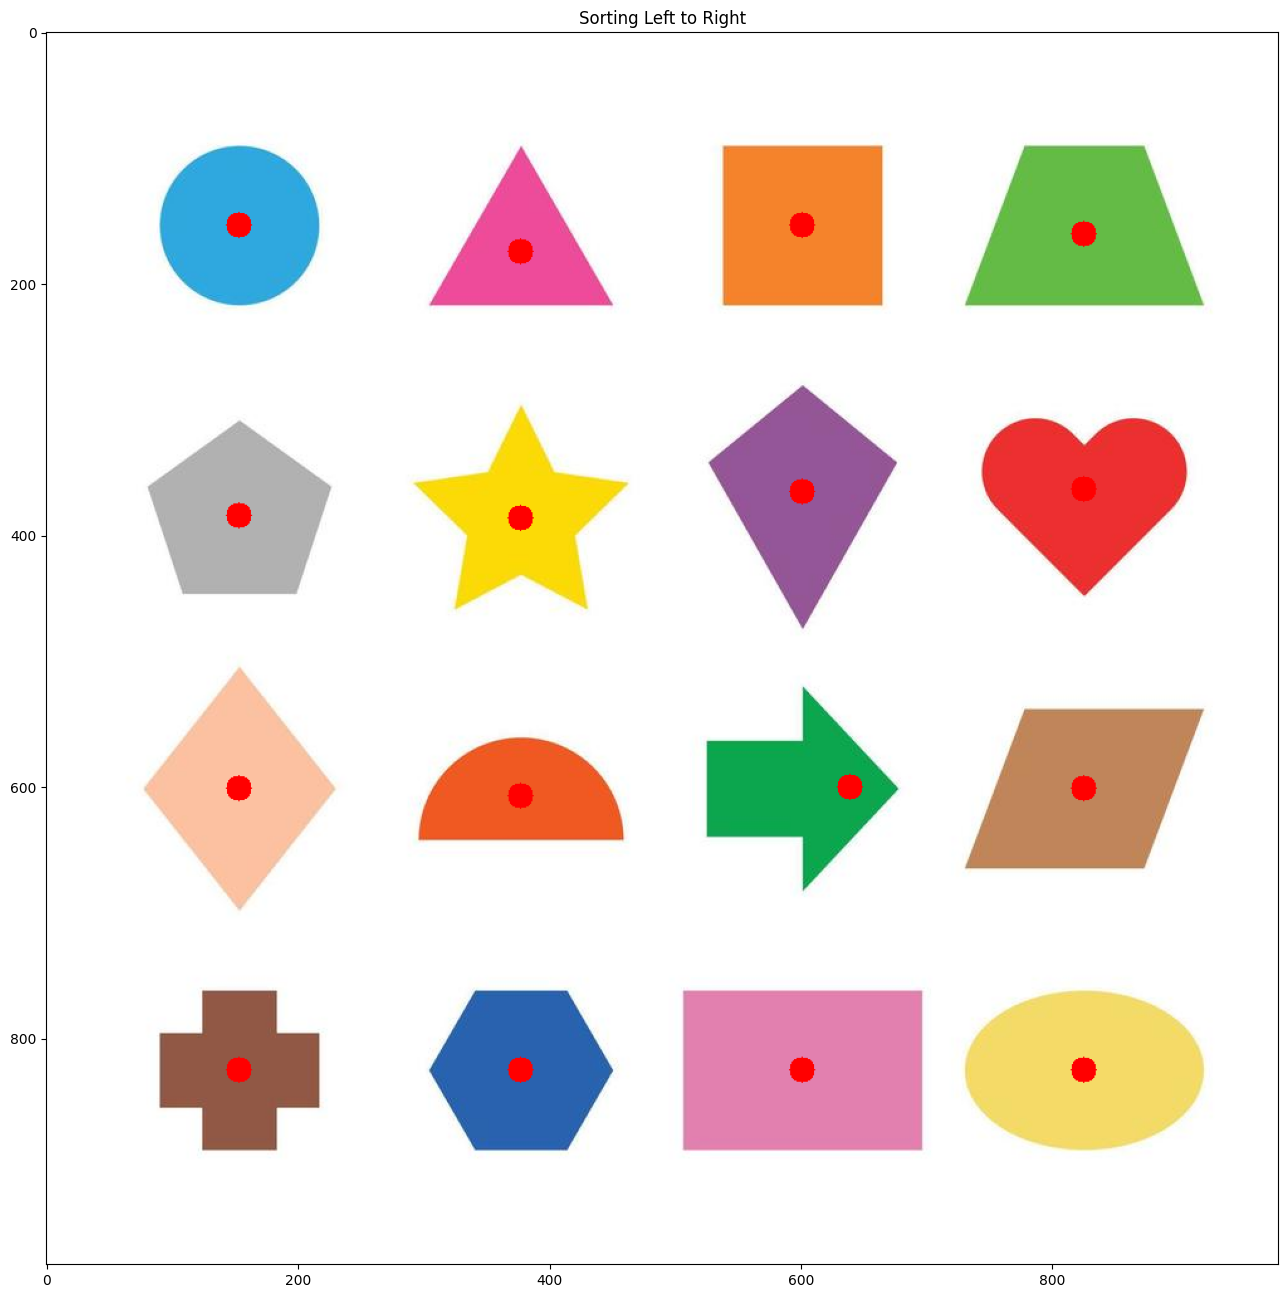

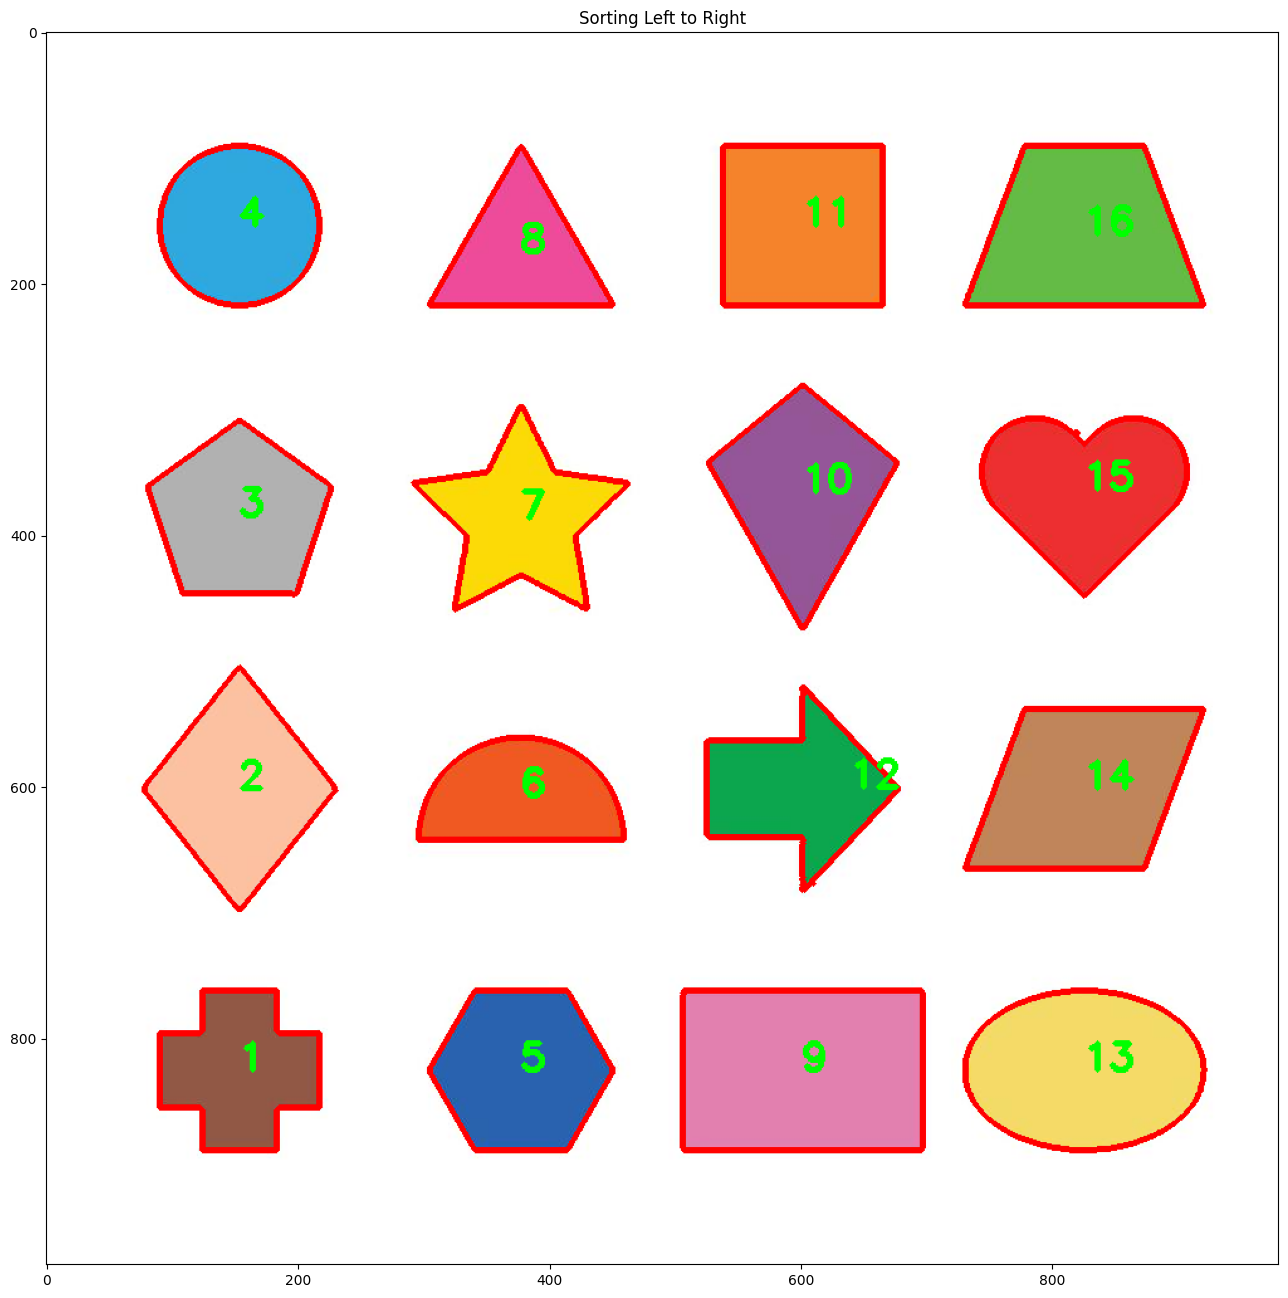

In [6]:
# Load our image
image = cv2.imread("../images/bunchofshapes.jpg")
original_image = image.copy()

# Compute Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)

# Showing the Contour centers
imshow("Sorting Left to Right", image)

# Sort by left to right using our x_coord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labelling Contours left to right
for (i, c) in enumerate(contours_left_to_right):
    cv2.drawContours(original_image, [c], -1, (0, 0, 255), 3)
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(original_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    (x, y, w, h) = cv2.boundingRect(c)

imshow('Sorting Left to Right', original_image)

### **Approximating Contours using ApproxPolyDP** ###
#### **Using ApproxPolyDP to approximate contours as a more defined shape** ####
#### **cv2.approxPolyDP(contour, Approximation Accuracy, Closed)** ####

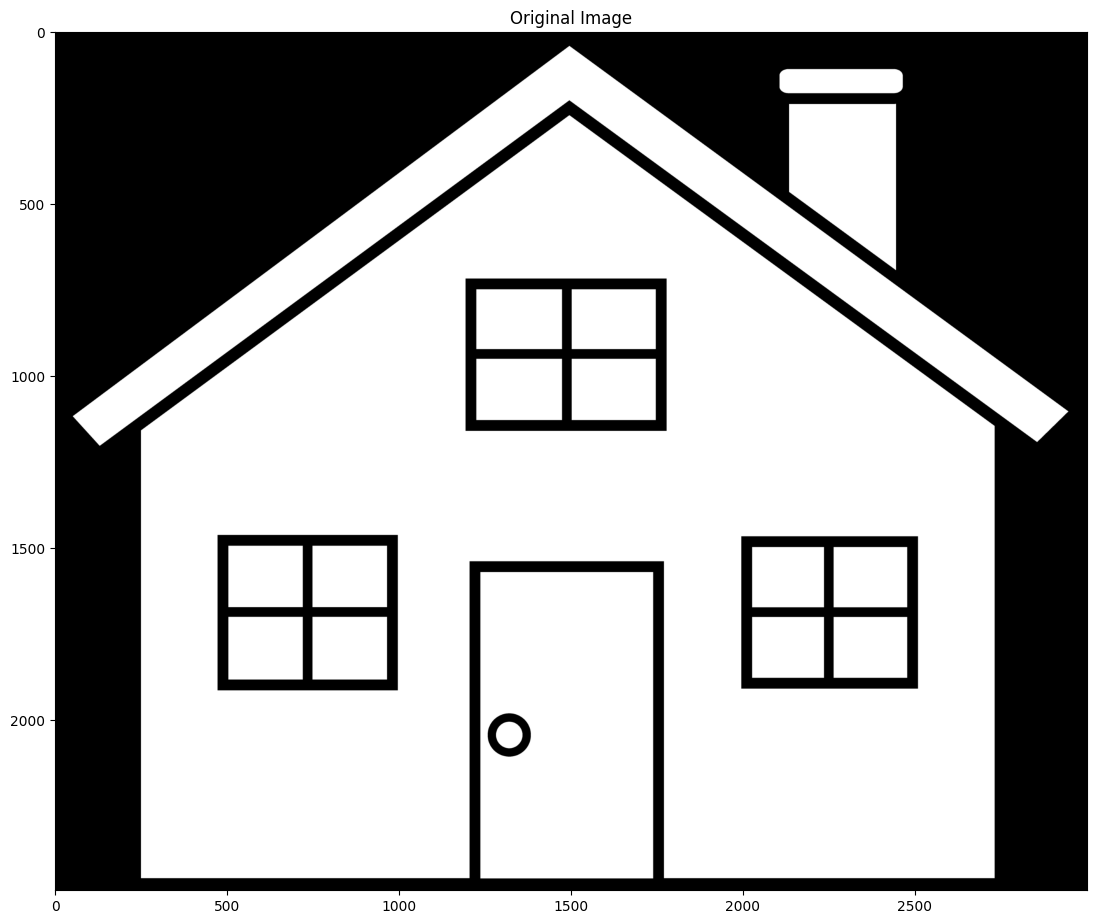

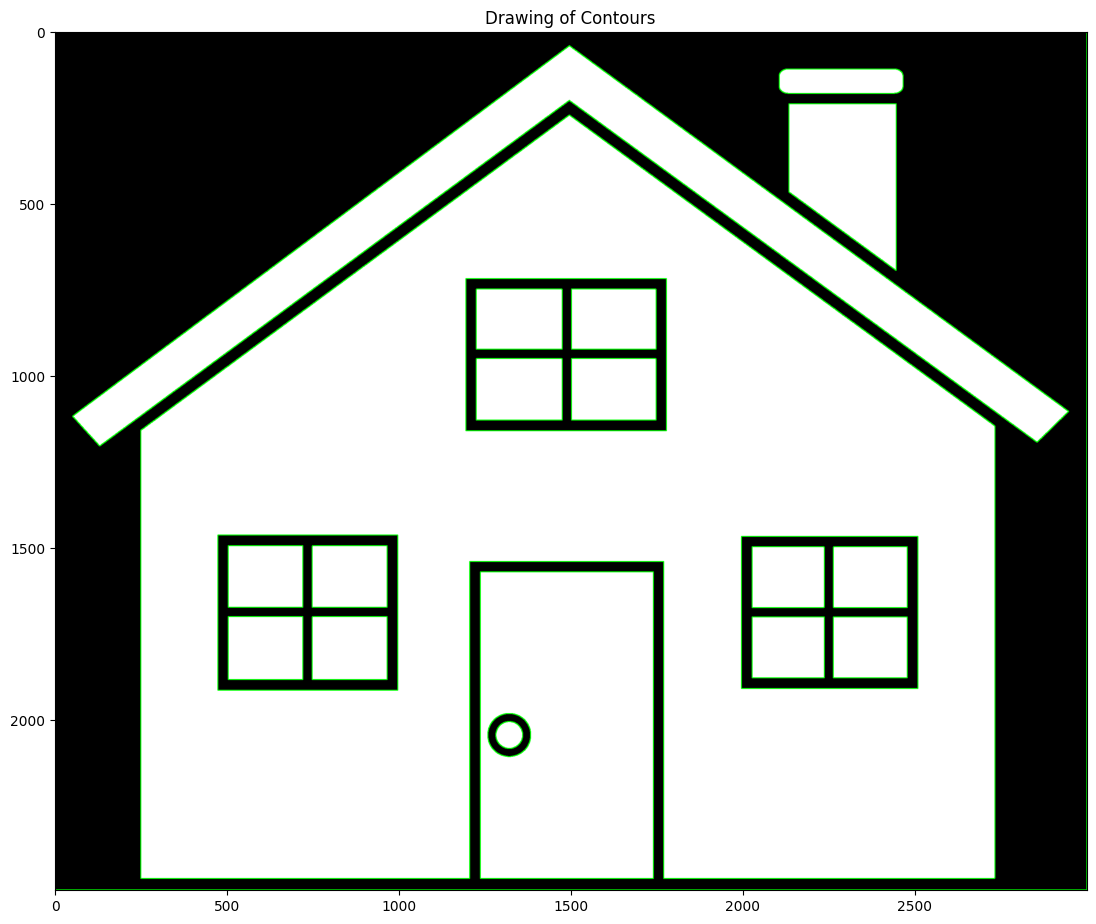

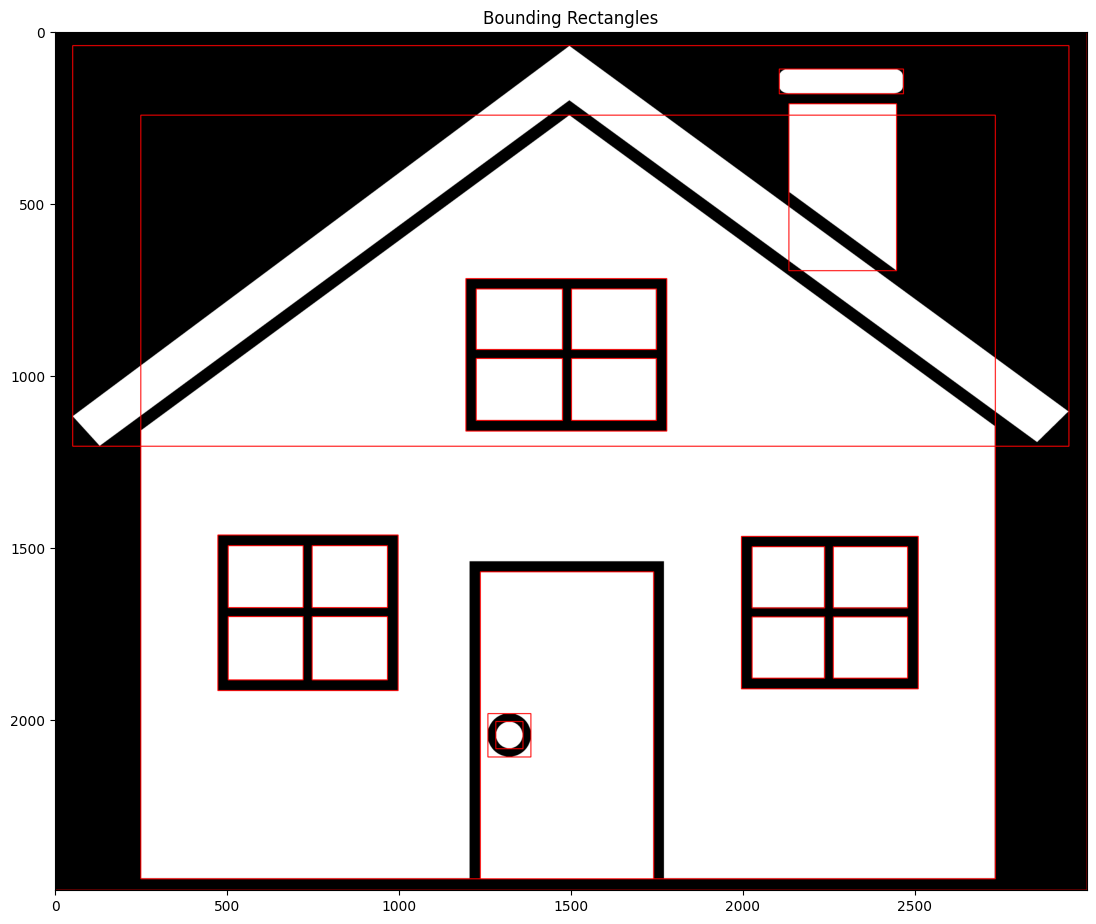

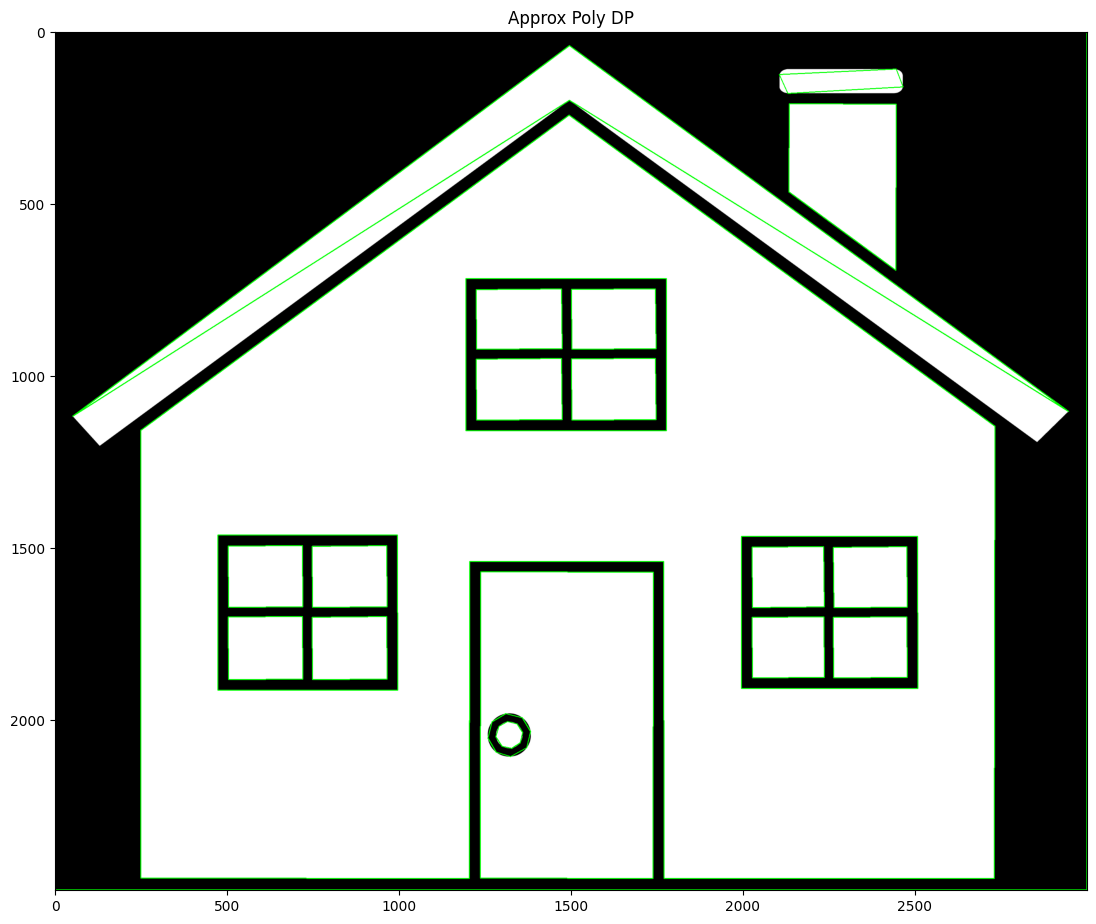

In [11]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread("../images/house.png")
orig_image = image.copy()
imshow("Original Image", orig_image)

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# # Iterate through each contour
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image, (x,y), (x+w, y+h),(0,0,255), 2)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

imshow("Drawing of Contours", image)
imshow("Bounding Rectangles", orig_image)
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow("Approx Poly DP", copy)

### **Convex Hull** ###

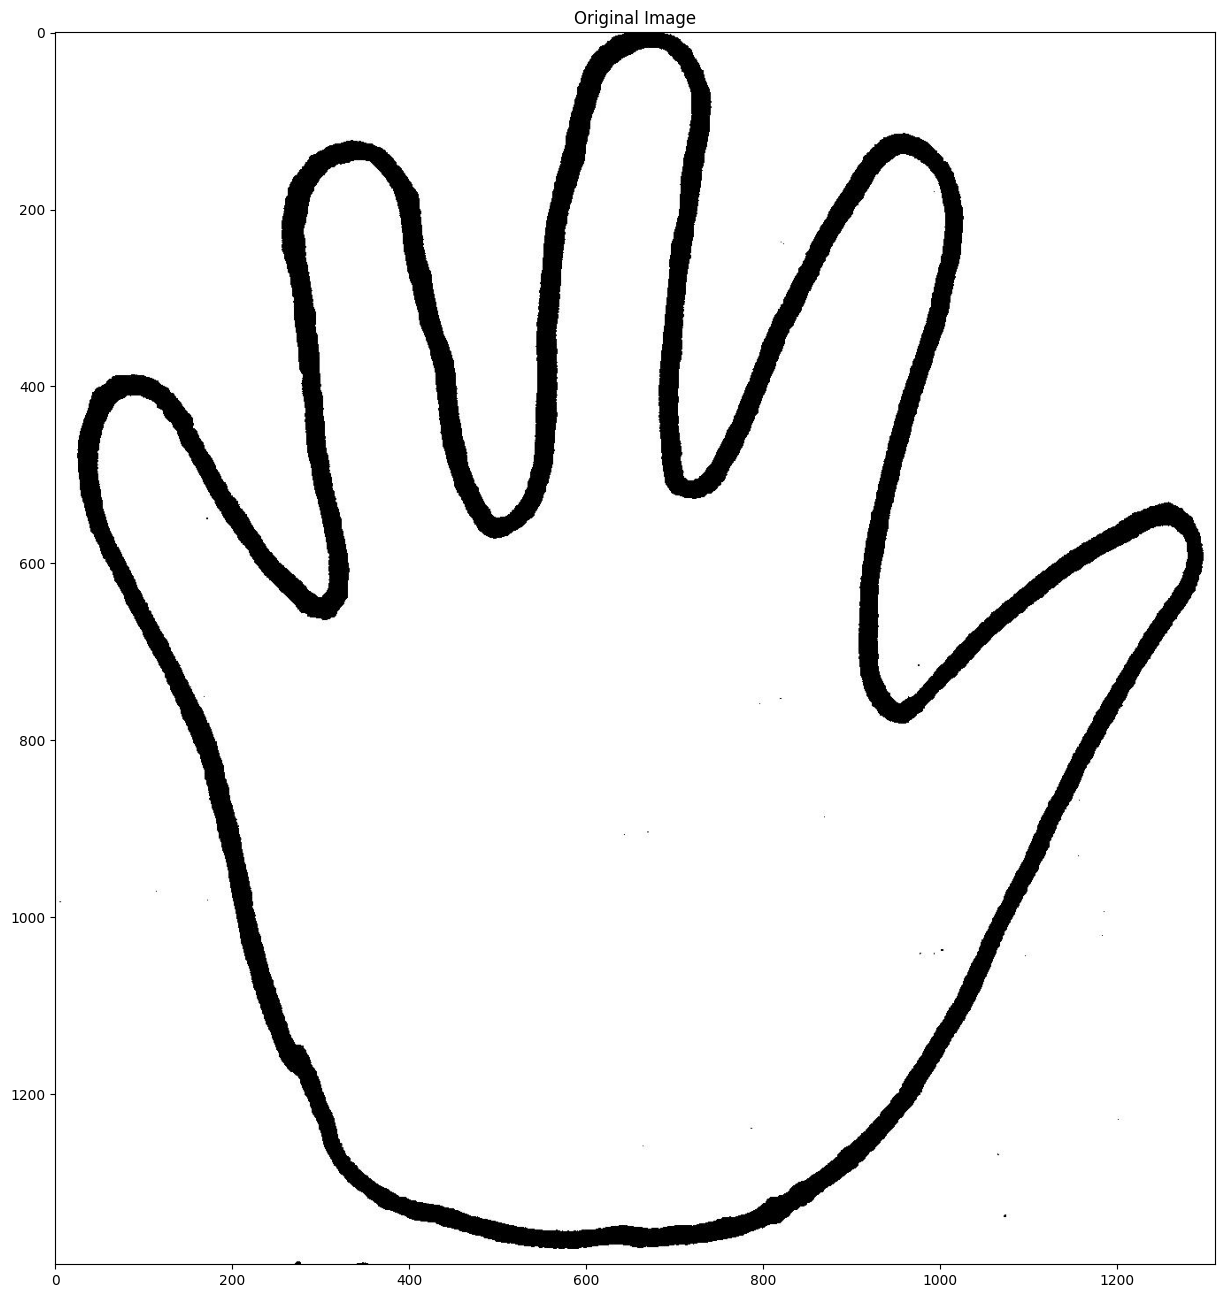

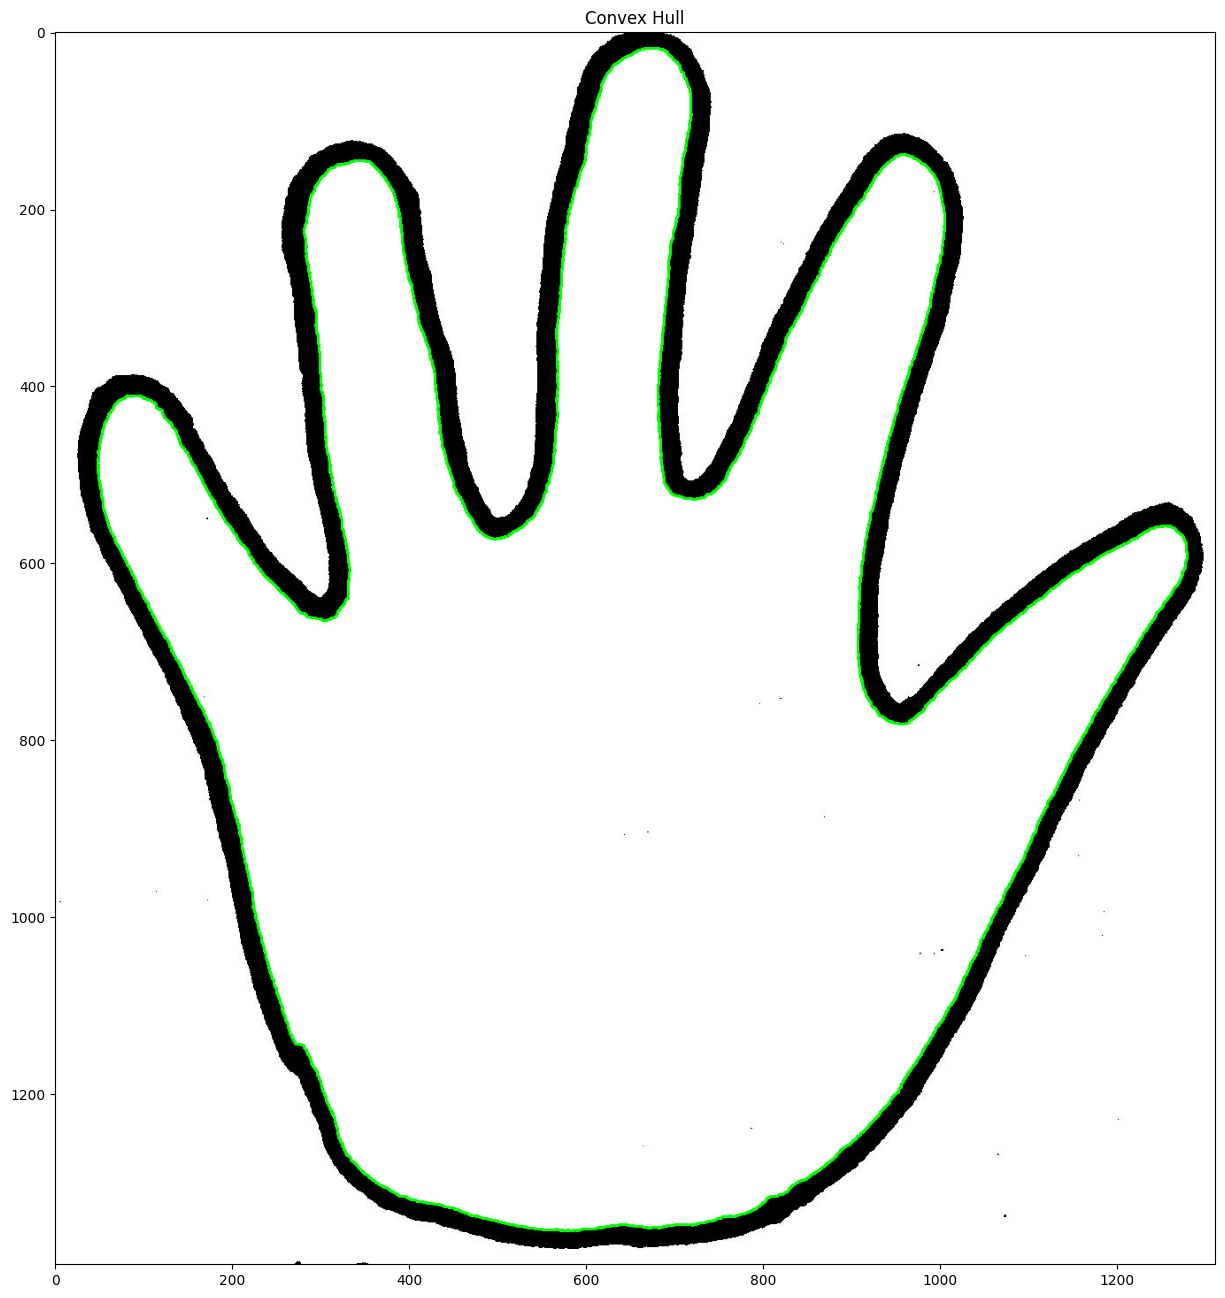

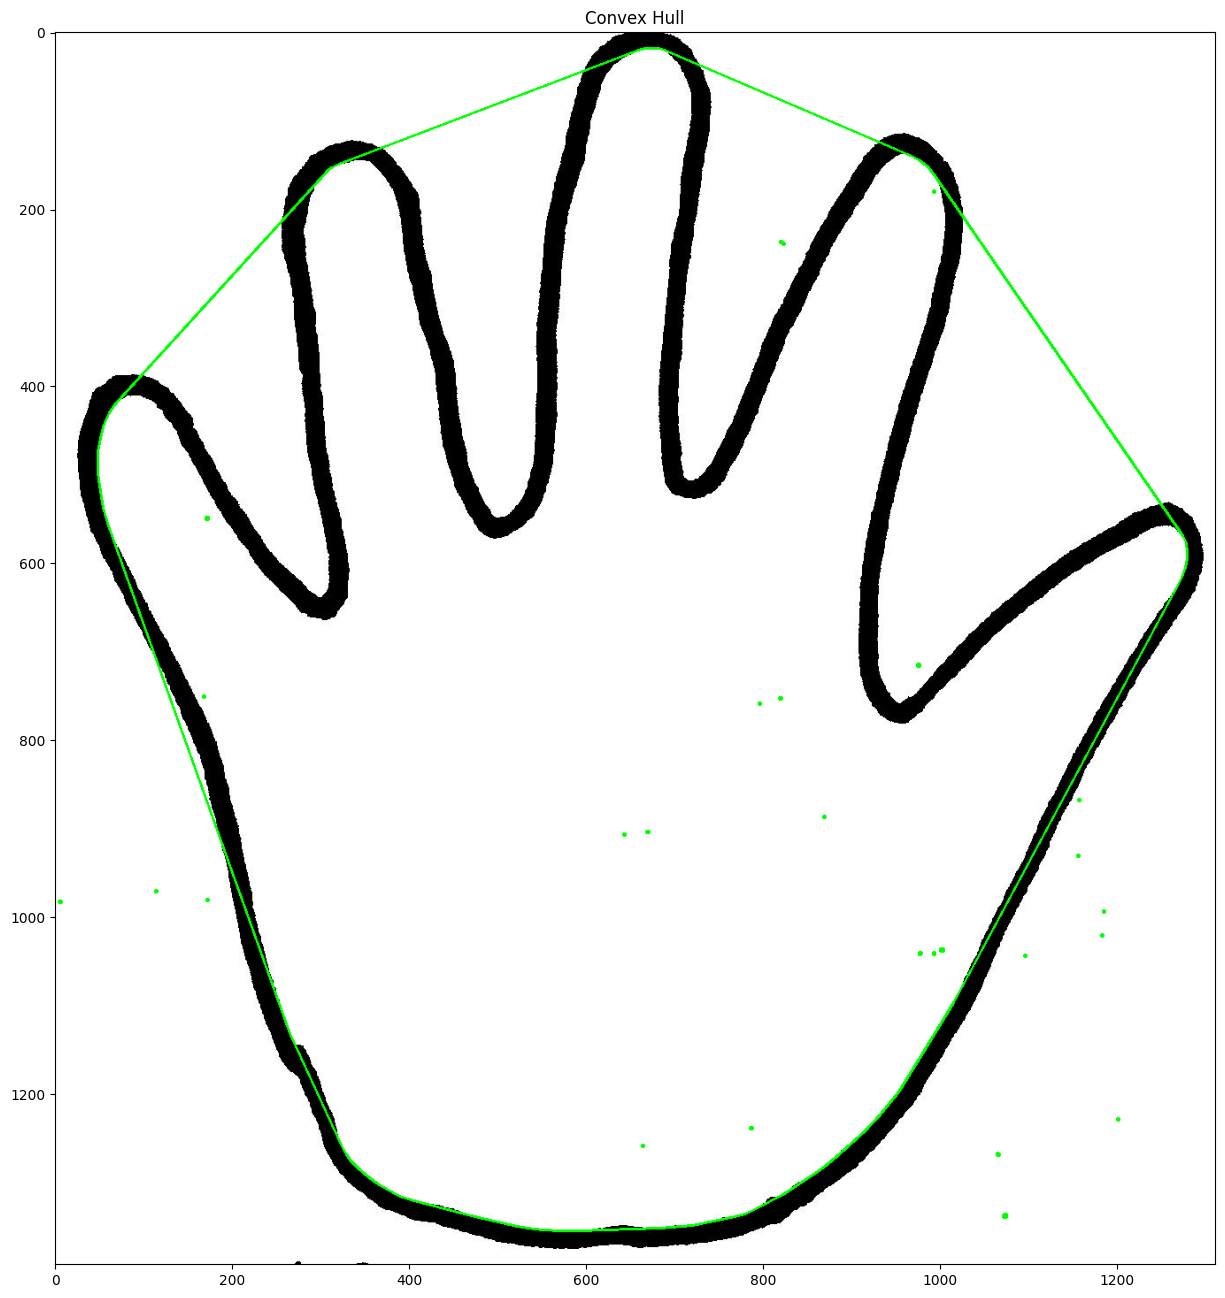

In [18]:
import numpy as np
import cv2

image = cv2.imread("../images/hand.jpg")
original_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Original Image", image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, [c], 0, (0, 255, 0), 2)
imshow("Convex Hull", image)

# Sort Contours by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(original_image, [hull], 0, (0, 255, 0), 2)

imshow("Convex Hull", original_image)

### **Matching Contours** ###
### **cv2.matchShapes(contour template, contour, method, method parameter)** ###

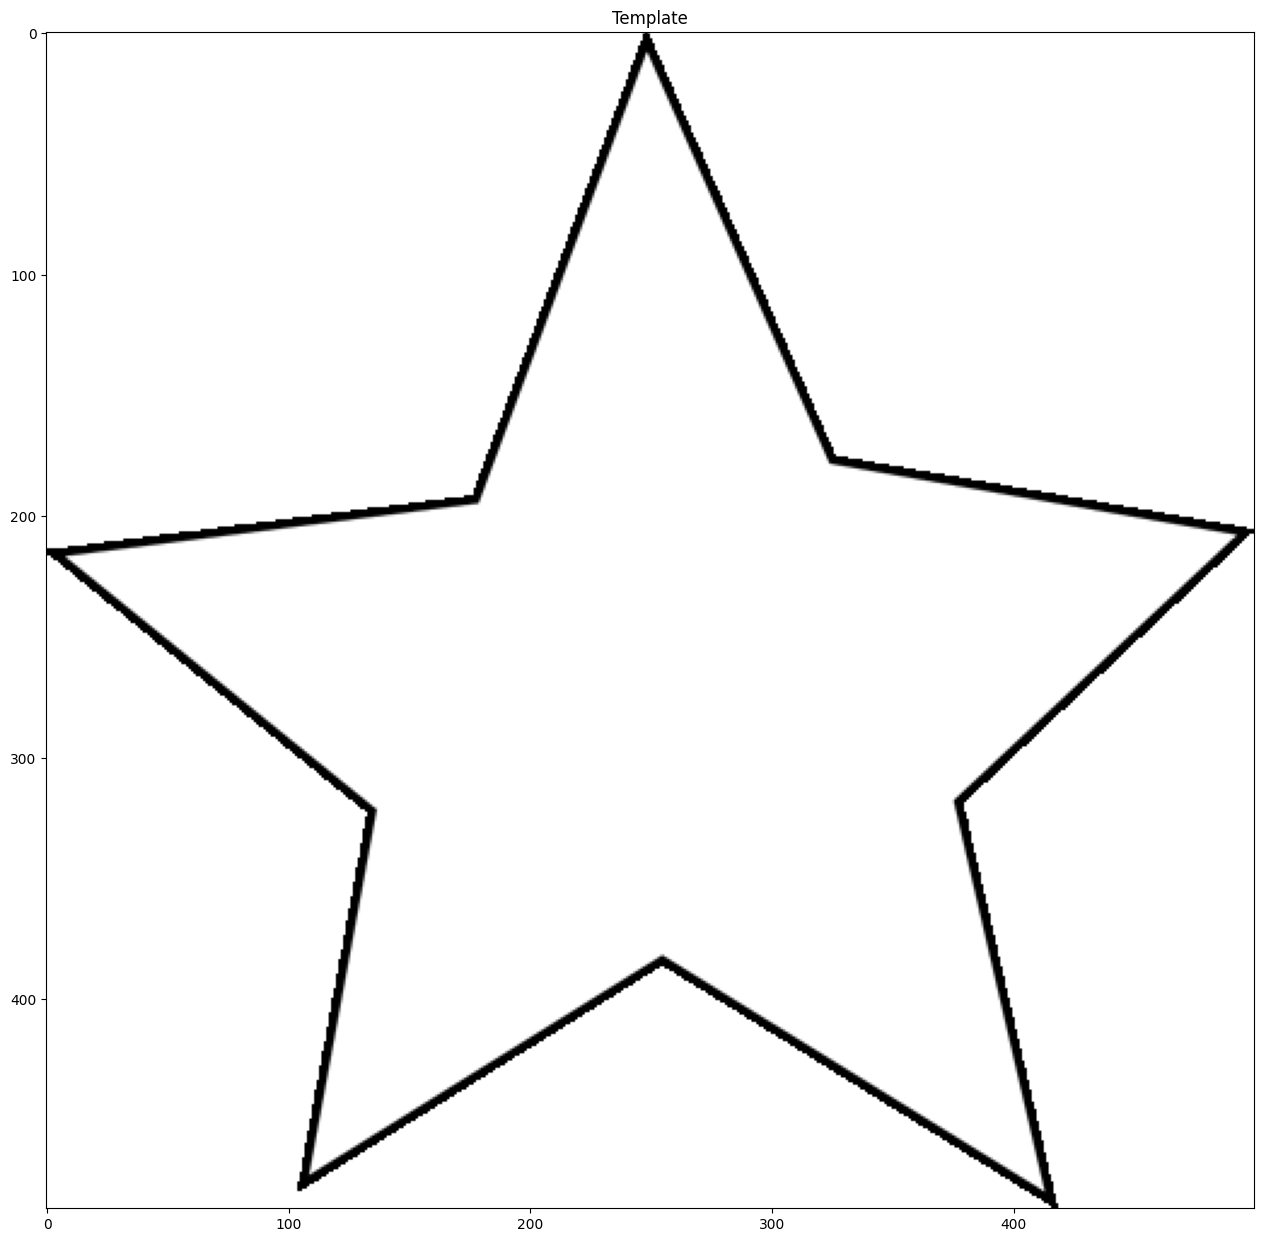

0.5958022589678779
0.5958022574298218
0.5828675911975303
1.1264867660078401
1.0567097815585431
0.6096003107353279
0.5331078606242274
0.5829801684138843
0.4574914975144528
0.925764086585534
0.4574914975144528
0.925764086585534
0.36582870723125727
0.3870699877533261
0.3900425037824763
0.5594898686729447
0.23026779503055111
0.23026779503055111
0.3377611064920516
0.4821685451460667
0.32208625424440707
0.6809609484164842
0.43967827372989476
0.8605515236454324
1.5772166497198956
1.034684513637345
0.4065958747374017
0.38213665698871774
0.8925456816456822
0.6770053184183639
0.752274373491275
0.4659815063206336
0.8230521699048491
0.677005318686841
0.7260792306615961
0.4904651480912865
2.4925895307732886
2.4925895307732886
0.26355343193129716
1.3317250330061716
0.12093412427609841
0.29910085512321627
0.12668985740996178
0.29172169080355476
0.6540817017970092
0.33705657692142227
0.15682113173911516
0.15173983138455996
0.24534774954748206
0.19147727760269234
0.2451771765552646
0.23019619936159194


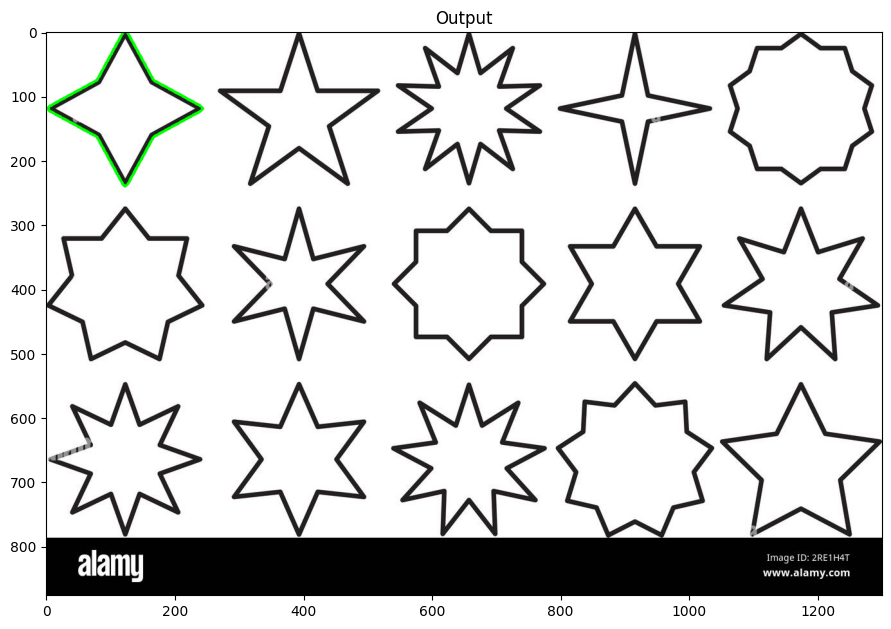

In [21]:
import cv2
import numpy as np

# Load the shape template or reference image
template = cv2.imread("../images/4star.png")
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
imshow("Template", template)

# Load the target image with the shapes we're trying to match
target = cv2.imread("../images/shapestomatch.jpg")
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template_gray, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contours = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contours, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []

cv2.drawContours(target, [closest_contour], -1, (0, 255, 0), 3)
imshow("Output", target)